## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data

In [2]:
data = pd.read_csv('youtube.csv')
data.head(3)

,RANK,NAME_OF_CHANNEL,TOTAL_NUMBER_OF_VIDEOS,SUBSCRIBERS,VIEWS,CATEGORY
0,#1,MrBeast,799,274M,50.98B,Entertainment
1,#2,T-Series,21.12K,267M,257.16B,Music
2,#3,Cocomelon - Nursery Rhymes,1.18K,176M,182.88B,Kids


## Data Shape

In [3]:
data.shape

(500, 6)

## Data Types

In [4]:
print(data.dtypes)

RANK                      object
NAME_OF_CHANNEL           object
TOTAL_NUMBER_OF_VIDEOS    object
SUBSCRIBERS               object
VIEWS                     object
CATEGORY                  object
dtype: object


## Missing values:

In [5]:
data.isna().sum()

RANK                      0
NAME_OF_CHANNEL           7
TOTAL_NUMBER_OF_VIDEOS    0
SUBSCRIBERS               0
VIEWS                     0
CATEGORY                  8
dtype: int64

## Data Statistical Description

In [6]:
data.describe()

,RANK,NAME_OF_CHANNEL,TOTAL_NUMBER_OF_VIDEOS,SUBSCRIBERS,VIEWS,CATEGORY
count,500,493,500,500,500,492
unique,500,493,444,246,471,32
top,#1,MrBeast,1.07K,20.9M,6.01B,Entertainment
freq,1,1,5,10,3,186


In [7]:
def convert_to_numeric(value):
    if isinstance(value, str):
        value = value.strip()
        if 'M' in value:
            return float(value.replace('M', '').strip()) * 1e6
        elif 'B' in value:
            return float(value.replace('B', '').strip()) * 1e9
        elif 'K' in value:
            return float(value.replace('K', '').strip()) * 1e3
    return float(value) 
data['SUBSCRIBERS'] = data['SUBSCRIBERS'].apply(convert_to_numeric)
data['VIEWS'] = data['VIEWS'].apply(convert_to_numeric)


## Histogram of Subscribers

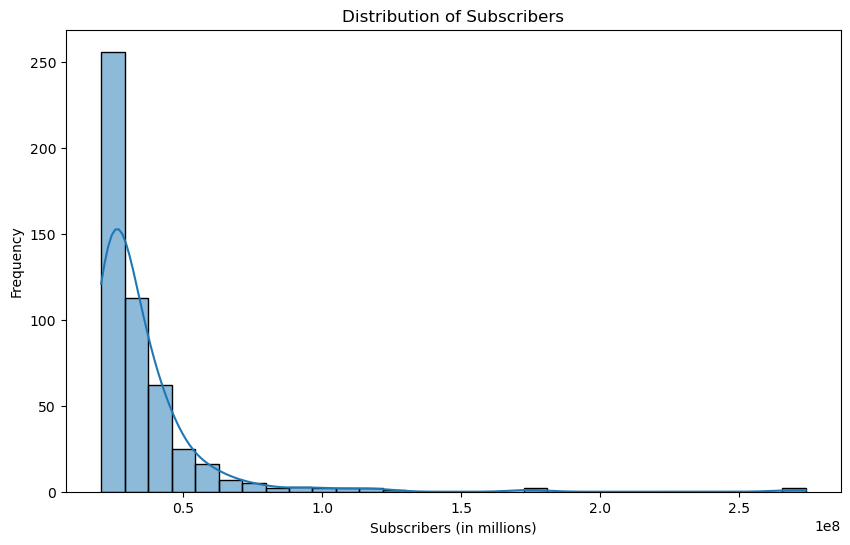

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data['SUBSCRIBERS'], bins=30, kde=True)
plt.title('Distribution of Subscribers')
plt.xlabel('Subscribers (in millions)')
plt.ylabel('Frequency')
plt.show()

## Top channels by Subscribers

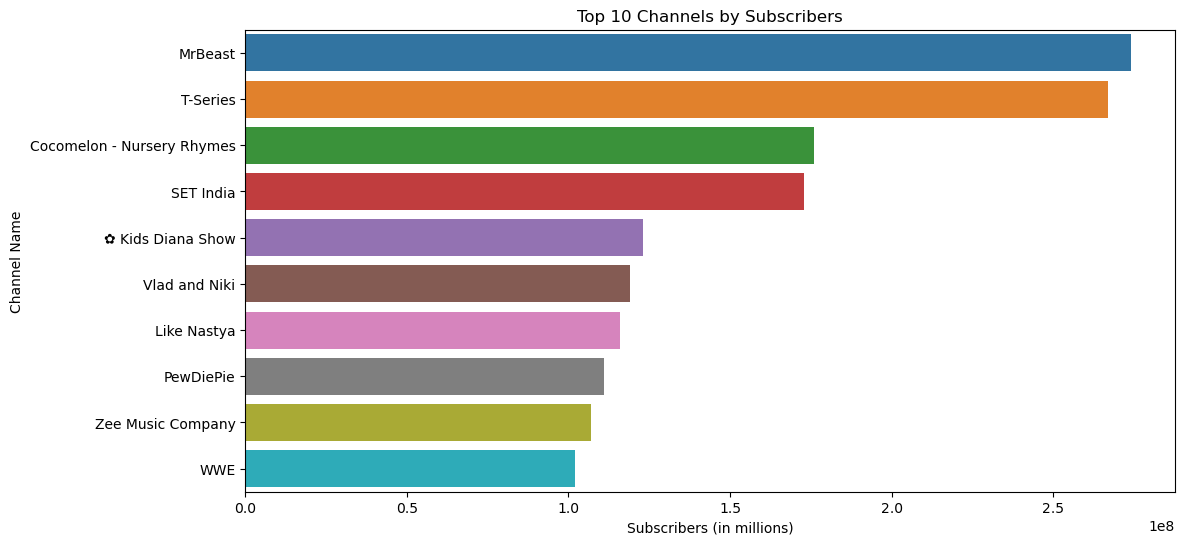

In [9]:
top_channels = data.nlargest(10, 'SUBSCRIBERS')
plt.figure(figsize=(12, 6))
sns.barplot(x='SUBSCRIBERS', y='NAME_OF_CHANNEL', data=top_channels)
plt.title('Top 10 Channels by Subscribers')
plt.xlabel('Subscribers (in millions)')
plt.ylabel('Channel Name')
plt.show()

## CATEGORY by sum of the VIEWS

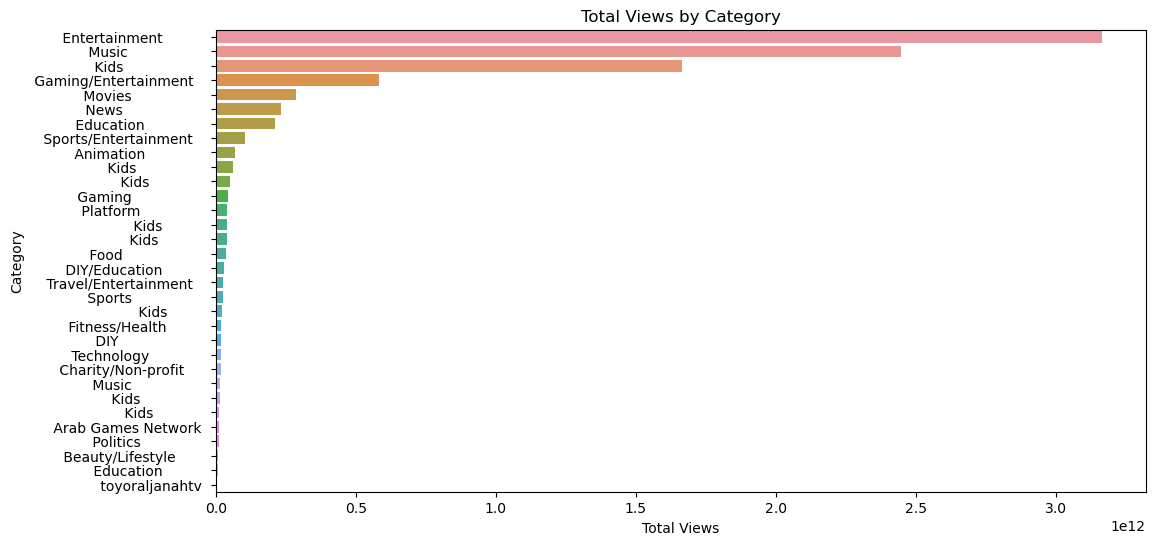

In [10]:
category_views = data.groupby('CATEGORY')['VIEWS'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='VIEWS', y='CATEGORY', data=category_views.sort_values('VIEWS', ascending=False))
plt.title('Total Views by Category')
plt.xlabel('Total Views')
plt.ylabel('Category')
plt.show()

## Top channels by Views

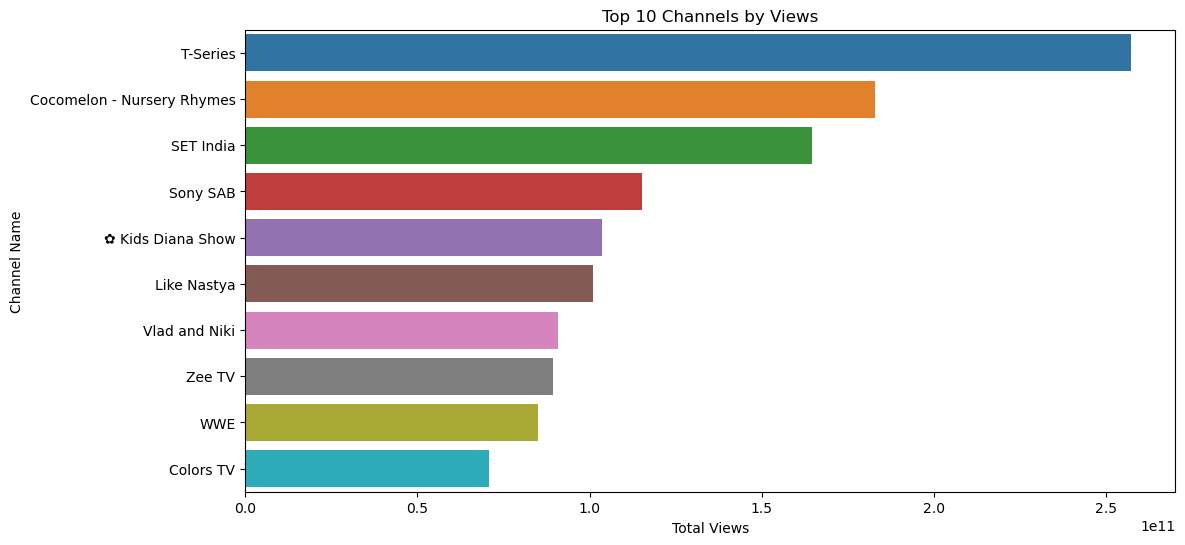

In [11]:
data['VIEWS'] = data['VIEWS'].apply(convert_to_numeric)
top_channels_views = data.nlargest(10, 'VIEWS')

plt.figure(figsize=(12, 6))
sns.barplot(x='VIEWS', y='NAME_OF_CHANNEL', data=top_channels_views)
plt.title('Top 10 Channels by Views')
plt.xlabel('Total Views')
plt.ylabel('Channel Name')
plt.show()